# Visualize the generated ECG signals

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import ecg_plot

base_path = "/home/zoeyhuang/MGB-MAIDAP/SSSD-ECG/src/sssd/sssd_label_cond/ch256_T200_betaT0.02"

In [7]:
label = np.load(os.path.join(base_path, '0_labels_bk.npy'))
data = np.load(os.path.join(base_path, '0_samples_bk.npy'))

In [9]:
print(label.shape, data.shape)


(400, 71) (400, 12, 1000)


(12, 1000)


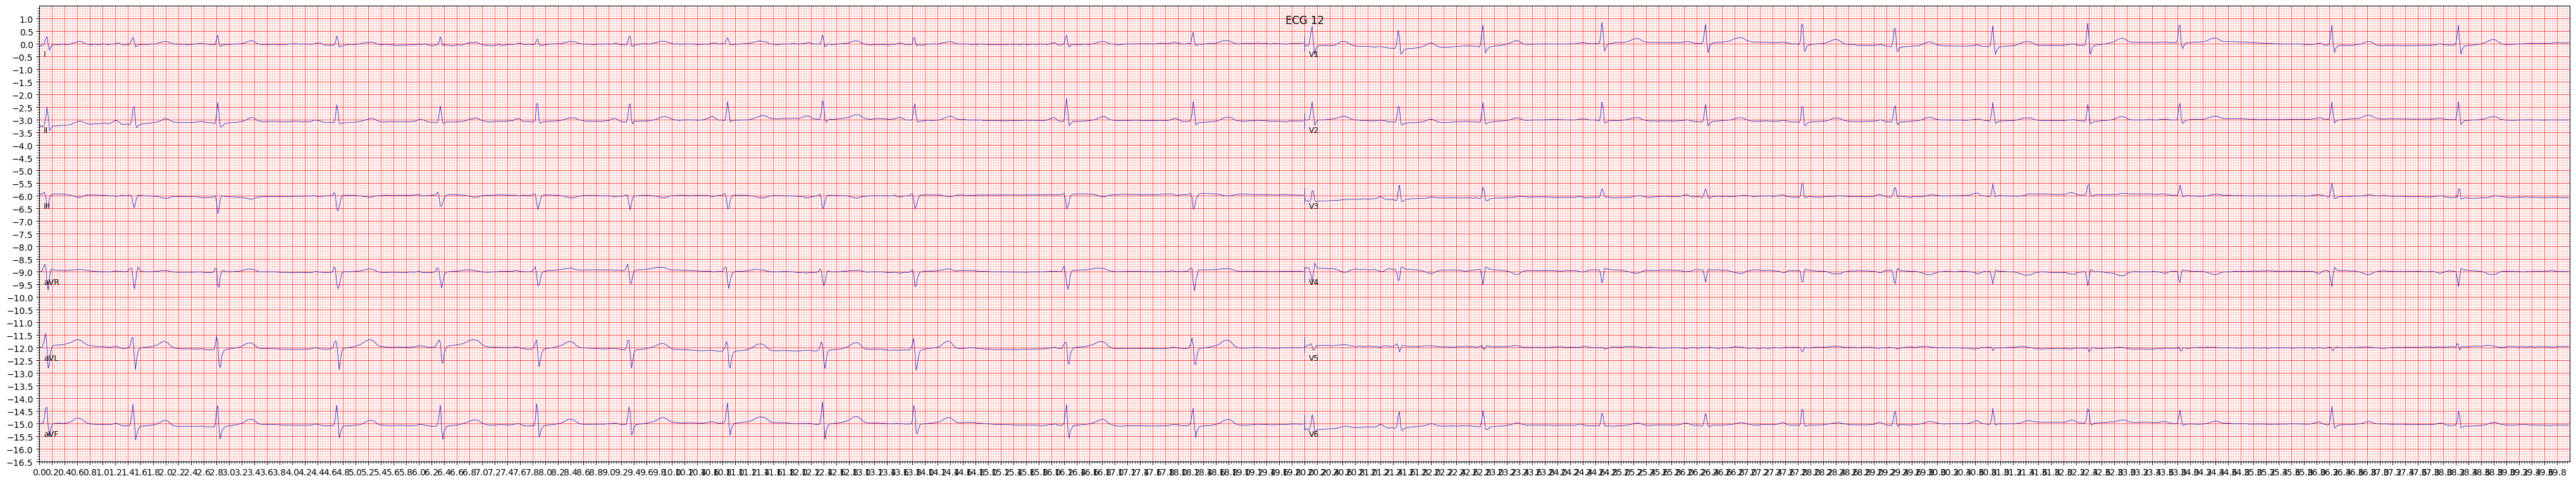

In [24]:
ecg = data[0]
print(ecg.shape)
ecg_plot.plot(ecg, sample_rate = 50)
ecg_plot.show()

In [ ]:
def visualize_ecg_single_sample(ecg_sample, sampling_rate=500):
    """
    Visualizes a 12-lead ECG signal in a medical-style format with grids.
    
    Parameters:
        ecg_sample (numpy.ndarray): A single ECG sample of shape (12, T), where T is the number of timestamps.
        sampling_rate (int): Sampling rate of the ECG data in Hz (default: 500).
    """
    if ecg_sample.shape[0] != 12:
        raise ValueError("Input ECG sample must have 12 leads (shape: [12, T]).")

    lead_labels = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
    time = np.arange(ecg_sample.shape[1]) / sampling_rate  # Time axis in seconds

    # Plot configuration
    plt.figure(figsize=(10, 12))  # Adjust size to fit all leads

    for i in range(12):
        # Plot each lead in a separate subplot
        plt.subplot(12, 1, i + 1)
        plt.plot(time, ecg_sample[i], color='black', linewidth=1)
        plt.title(lead_labels[i], loc="right", fontsize=10)
        plt.ylim(-1, 1)  # Adjust y-axis range for better visualization
        plt.xlim(0, time[-1])
        plt.grid(which="both", linestyle="--", linewidth=0.5, color="gray")
        if i < 11:
            plt.tick_params(labelbottom=False)  # Hide x-axis labels for all but the last lead
        else:
            plt.xlabel("Time in seconds", fontsize=10)

        plt.ylabel("mV", fontsize=8, rotation=0, labelpad=20, loc="center")

    plt.tight_layout(h_pad=1.0)  # Adjust space between plots
    plt.suptitle("12-Lead ECG Visualization", fontsize=14, y=0.95)
    plt.show()

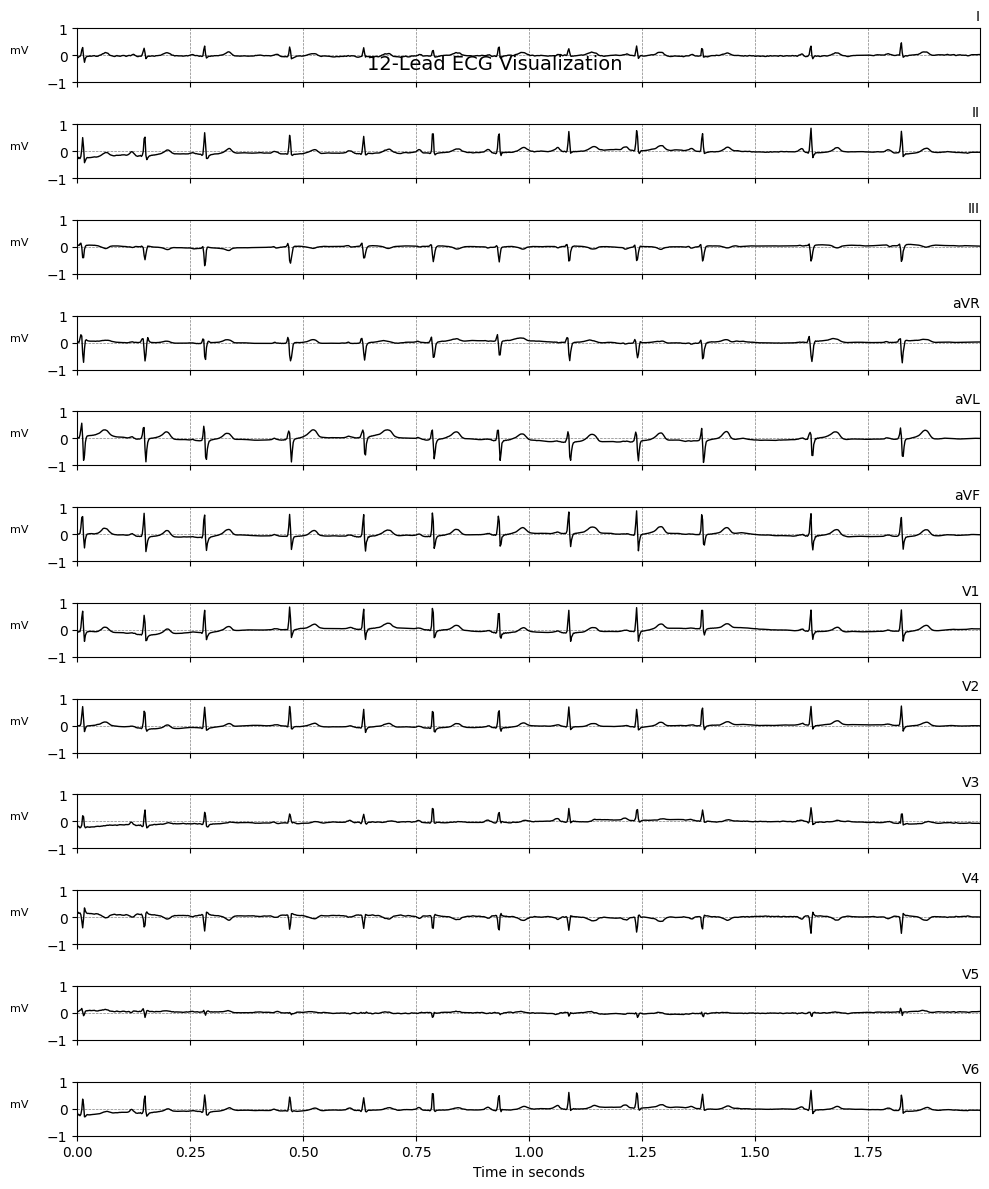

In [15]:
ecg_sample = data[0] # Replace with your actual ECG sample data
visualize_ecg_single_sample(ecg_sample, sampling_rate=500)